## Python Lab 03

In [2]:
!pip install numpy matplotlib tqdm

   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   ------ --------------------------------- 2.1/12.9 MB 11.8 MB/s eta 0:00:01
   -------------- ------------------------- 4.7/12.9 MB 11.9 MB/s eta 0:00:01
   --------------------- ------------------ 7.1/12.9 MB 11.5 MB/s eta 0:00:01
   ------------------------------ --------- 9.7/12.9 MB 11.8 MB/s eta 0:00:01
   ------------------------------------- -- 12.1/12.9 MB 11.4 MB/s eta 0:00:01
   ---------------------------------------- 12.9/12.9 MB 11.2 MB/s  0:00:01
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------- ----------------------------- 2.1/8.1 MB 11.8 MB/s eta 0:00:01
   ----------------------- ---------------- 4.7/8.1 MB 11.9 MB/s eta 0:00:01
   ---------------------------------- ----- 7.1/8.1 MB 11.8 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 11.2 MB/s  0:00:00
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   -----------------

In [3]:
import numpy as np

In [10]:
from tqdm import tqdm

---

# Task
Numpy task

* Generate $N\times 2$ array of random numbers $[0,1]$
* Calculate squares of all elements
* Add elements along the short direction (resulting in $N\times 1$ array)
* Count the number of elements less than 1
* Calculate the value:
$$4\cdot\frac{N_{x<1}}{N}$$

In [47]:
N = 100000000
mat = np.random.random((N,2))

In [48]:
mat2=mat**2

In [49]:
mats=np.sum(mat2,axis=1)
mats

array([0.31382657, 0.79153118, 0.86384935, ..., 0.90892555, 1.36397125,
       0.13399536], shape=(100000000,))

In [50]:
# NumPy equivalent of: [i for i in _ if i>1]
# use existing 1D array `mats`
matx = mats[mats<1]

In [36]:
matx = [i for i in mats if i<1]

In [51]:
4*len(matx)/N

3.14171432

In [52]:
np.pi

3.141592653589793

almost the same...

## Task
    
Implement a function calculating price $P$    

   $$P(y;T, \vec{C}, F)=\frac{F}{(1+y)^T}+\sum_{i=1}^T\frac{C_i}{(1+y)^i}$$
   
   
   From coupons $\vec{C}\in \mathbb{R}^T$ (narray) and given yield-to-maturity $y$ and face value $F$.
  For example choose the following values:
  
   $$y=5\%,\quad F=\$100, \quad C_i=\$3,\quad T=29$$

In [5]:
def P(y, T, C, F):
    return F/(1+y)**T + np.sum([C[i-1]/(1+y)**i for i in range(1,T+1)])

In [3]:
y=0.05
F=100
T=29
C=[3]*29

In [6]:
P(y,T,C,F)

69.71785284354598

---


# Task

## 
Consider a logistic map $\scriptsize x\ni[0,1]\to f(x)=kx(1-x)\in[0,1]$ for $\scriptsize k\in[0,4]$.

The iteration 

$$\scriptsize x_{n+1}=kx_n(1-x_n)$$

has two fixed points (solution to $\scriptsize x=f(x)$):  $\scriptsize x=0$ and $\scriptsize x=1-\frac1k$.

## 
Q: What happens when $\scriptsize k=0.5$, $\scriptsize k=2.5$, $\scriptsize k=3.1$, $\scriptsize k=3.5$, $\scriptsize k=4$? And why?

More precisely:
* print the series $x_n$ for given $k$s
* plot the series in those cases
* Draw a graph showing $(k, x_n)$ for many numbers $n>100$ and different $k\in [0,4]$
[similar to this](https://en.wikipedia.org/wiki/Logistic_map#/media/File:Logistic_Bifurcation_map_High_Resolution.png)

can we speed up the process.

In [4]:
import matplotlib.pyplot as plt

In [5]:
def logistic_map(x, k):
    """Calculates the next value in the logistic map."""
    return k * x * (1 - x)

In [6]:
n_iterations = 150
n_transient = 50  # Number of iterations to discard to remove transient behavior
k_values = [0.5, 2.5, 3.1, 3.5, 4.0]
x0 = 0.1

# Create a figure for the time series
plt.figure(figsize=(15, 10))


<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

k = 0.5, Last 10 values: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
k = 2.5, Last 10 values: [0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6]
k = 3.1, Last 10 values: [0.7646 0.558  0.7646 0.558  0.7646 0.558  0.7646 0.558  0.7646 0.558 ]
k = 3.5, Last 10 values: [0.5009 0.875  0.3828 0.8269 0.5009 0.875  0.3828 0.8269 0.5009 0.875 ]
k = 4.0, Last 10 values: [0.9003 0.3589 0.9204 0.293  0.8286 0.568  0.9815 0.0726 0.2694 0.7873]


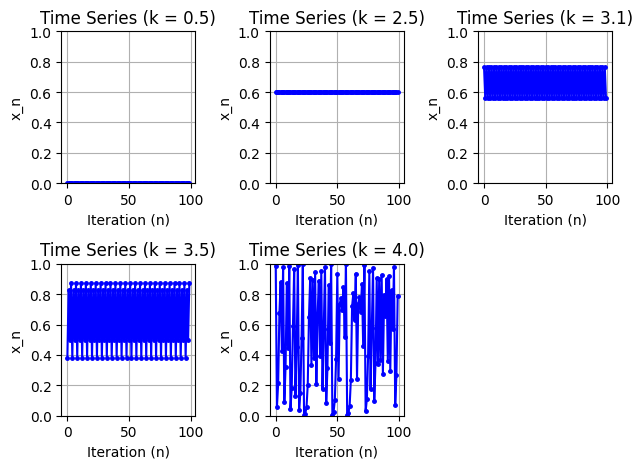

In [7]:

for i, k in enumerate(k_values):
    # Iterate the map
    x = x0
    trajectory = []
    for n in range(n_iterations):
        x = logistic_map(x, k)
        trajectory.append(x)
    
    # Plot the time series (after discarding transient)
    plt.subplot(2, 3, i+1)
    plt.plot(trajectory[n_transient:], 'b.-', markersize=5)
    plt.title(f'Time Series (k = {k})')
    plt.xlabel('Iteration (n)')
    plt.ylabel('x_n')
    plt.ylim(0, 1)
    plt.grid(True)
    
    # Print the last few values
    print(f"k = {k}, Last 10 values: {np.round(trajectory[-10:], 4)}")

plt.tight_layout()
plt.show()

In [12]:
k_res = 10000  # Resolution of k axis
n_iter_bifurcation = 10000 # Total iterations per k
n_last_plot = 200         # Number of last iterations to plot

# Create an array of k values from 2.8 to 4.0 (the interesting region)
k_range = np.linspace(2.8, 4.0, k_res)
# Initialize x
x = 1e-5 * np.ones(k_res) 

plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

100%|██████████| 10000/10000 [00:00<00:00, 20641.07it/s]


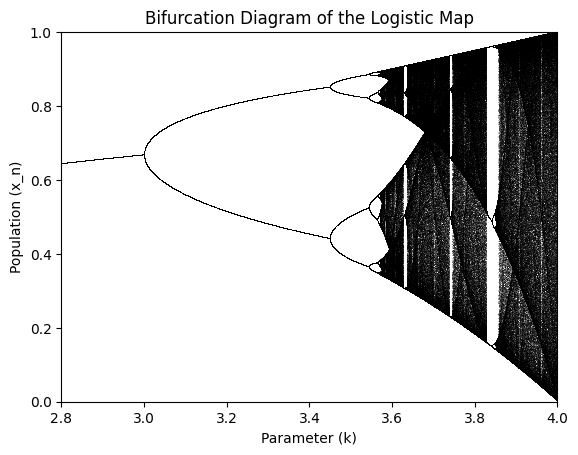

In [13]:
for n in tqdm(range(n_iter_bifurcation)):
    x = k_range * x * (1 - x)
    # After a transient, start plotting the points
    if n >= (n_iter_bifurcation - n_last_plot):
        plt.plot(k_range, x, ',k', alpha=0.25, markersize=0.5) 
        # ',k' means black commas (tiny dots), alpha for transparency

plt.title("Bifurcation Diagram of the Logistic Map")
plt.xlabel("Parameter (k)")
plt.ylabel("Population (x_n)")
plt.xlim(2.8, 4.0)
plt.ylim(0, 1)
plt.show()

nie rozmiuem

---

# Task
## 
find a solution to the equation:

$$x=\cos(x)$$


for $x\in [0,1]$ using three methods:
* bisection: <br>
    we divide an interval $[a, b]$, to $[a,c]$  and $[c, b]$ for $c=\frac{a+b}{2}$ and for next iteration we choose the interval where the sign is changed.
* naive iteration $x_{n+1}=\cos(x_n)$,
* Newton's method:<br>
 for $f(x)=0$ we iterate $$x_{n+1}=x_{n}-\frac{f(x_n)}{f'(x_n)}$$

Plot function $y=x$ and $y=\cos(x)$.<br>
Analyze how fast the solution is reached.

## 
Solve the equation 
$$P(y; \vec{C}, F) = 53.52$$

$$F(x)=\cos(x)-x$$

In [14]:
epsilon=1e-10

In [17]:
# naive

def naive(fun):
    x = 0
    while np.abs(x-fun(x)) > epsilon:
        x = fun(x)
    return x


In [18]:
naive(np.cos)

np.float64(0.7390851331706995)

In [32]:
# bisection

def bisection(fun):
    a, b = 0, 1
    while True:
        c = (a+b)/2
        # print(a,c,b)
        if b-a < epsilon:
            return c
        if fun(a)*fun(c)>0:
            a, b = c, b
        else:
            a, b = a, c

In [33]:
bisection(lambda x: np.cos(x)-x)

0.7390851332165767

In [34]:
# niuton

def niuton(fun):
    pass

nie rozumeim

---

# Task
Analyze Newton's method for 

$$f(x)=|x|^p$$

for different values of $p$.

---

# Task
## 
Analyze the Newton's method for 

$$f(z)=z^3-1,\;\; f'(z)=3z^2$$

$$z=e^{2m\pi i/3},\;\; m=1,2,3$$

for complex valued $z$. Draw the Newton's fractal.<br>
How effectively can you do it?
## 
Draw the Hayley fractal

## 
Draw the Newton fractal for equation
$$f(z) = z^3-2z+2$$